In [1]:
""" Inflation Prediction Study
Author: Camilla Nore
        Trygve Utstumo
Date:   2015-08-30
"""
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

#%matplotlib notebook
%matplotlib inline
#plt.rcParams['figure.figsize'] = (10.0, 8.0)

# NB: As this is iPython, the module will be cached. If you change 
#     the module, you have to restart the iPython kernel.
from inflastudy import InflaData  # Custom module for this study.

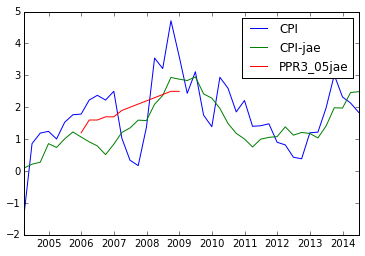

In [2]:
data = InflaData.InflaData(filename='data/kongepanel_upd_ark_A.csv')
#print data.raw_data.CPI       # Uncomment this line to see raw CPI data.
#print data.raw_data.columns   # Uncomment this line to see column names.
# Column names wo special characters can be accessed as object members, e.g.: raw_data.CPI
plt.plot(data.raw_data.index, data.raw_data.CPI,label='CPI')
plt.hold(True)
# Column names with special characters need to be accessed by key, e.g.: raw_data['CPI-jae']
plt.plot(data.raw_data.index, data.raw_data['CPI-jae'],    label='CPI-jae')
plt.plot(data.raw_data.index, data.raw_data['PPR3_05jae'], label='PPR3_05jae')
plt.legend()

['PPR3_05jae', 'PPR1_06jae', 'PPR2_06jae', 'PPR3_06jae', 'PPR1_07jae', 'PPR2_07jae', 'PPR3_07jae', 'PPR1_08jae', 'PPR2_08xe', 'PPR3_08xe', 'PPR4_08xe', 'PPR1_09xe', 'PPR2_09xe', 'PPR3_09xe', 'PPR1_10xe', 'PPR2_10xe', 'PPR3_10xe', 'PPR1_11xe', 'PPR2_11xe', 'PPR3_11xe', 'PPR1_12xe', 'PPR2_12xe', 'PPR3_12xe', 'PPR1_13xe', 'PPR2_13xe', 'PPR3_13xe', 'PPR4_13xe', 'PPR1_14xe', 'PPR2_14xe', 'PPR3_14xe', 'PPR4_14xe', 'PPR1_15xe', 'PPR2_15xe', 'CPI-jae']
columns Index([u'PPR3_05folio', u'PPR1_06folio', u'PPR2_06folio', u'PPR3_06folio',
       u'PPR1_07folio', u'PPR2_07folio', u'PPR3_07folio', u'PPR1_08folio',
       u'PPR2_08folio', u'PPR3_08folio', 
       ...
       u'Boligpris Gap mot trend med ensidig HP-filter⁴',
       u'Boligpris Gap mot trend med utvidet HP-filter³',
       u'BoligprisGap mot snitt (rekursivt)',
       u'NæringseiendomGap mot trend ved ensidig HP-filter³',
       u'NæringseiendomGap mot trend ved utvidet HP-filter²',
       u'NæringseiendomGap mot snitt (rekursivt)',
   

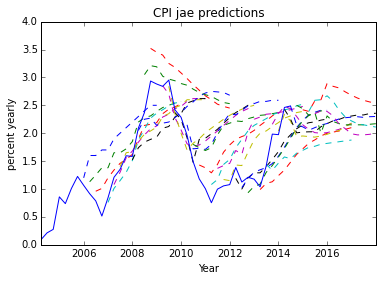

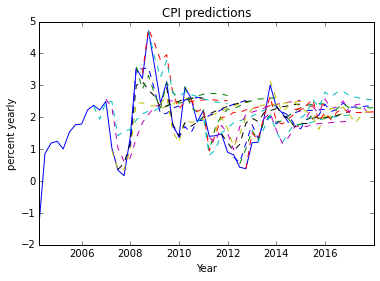

In [24]:
plt.figure('All jae predictions')
plt.title('CPI jae predictions')
plt.ylabel('percent yearly')
plt.xlabel('Year')
jae_columns = []
for col in data.raw_data.columns:
    if ('xe' in col) or ('jae' in col):
        jae_columns.append(col)
        if 'CPI-jae' in col:
            linestyle ='b-' 
        else : 
            linestyle = '--'
        plt.plot(data.raw_data.index,
                 data.raw_data[col], linestyle,
                 label=col)

print jae_columns
jae_columns.remove('CPI-jae')


cpi_columns = []
plt.figure('CPI predictions')
plt.title('CPI predictions')
plt.ylabel('percent yearly')
plt.xlabel('Year')
plt.plot(data.raw_data.index,
         data.raw_data['CPI'],)
         #label ='CPI'
         
print 'columns', data.raw_data.columns
for column_name in data.raw_data.columns:
    #print'col is', cpi
    if ('cpi' in column_name):
        #print 'Found cpi in column:', cpi
        cpi_columns.append(column_name)
        plt.plot(data.raw_data.index,
                 data.raw_data[column_name],'--')
                 #label=column_name)
#plt.legend()        
print 'List of cpi columns:', cpi_columns
    
#for col in data.raw_data.columns:
 #   print col


In [ ]:
#How to find the vector of predictions one quarter ahead
for t in data.raw_data.index:
    for col in jae_columns:
        value = data.raw_data.loc[t,col]
        if not math.isnan(value):
            # This is a start, but def not correct
            # Maybe because the jae columns are not sorted correctly?
            data.raw_data.loc[t, 'firstpred'] = value
            data.raw_data.loc[t, 'firstpred_']
        break # stop the loop on the first valid prediction
        
print data.raw_data.firstpred
plt.figure('First prediction')
plt.plot(data.raw_data.index,
        data.raw_data['CPI-jae'])

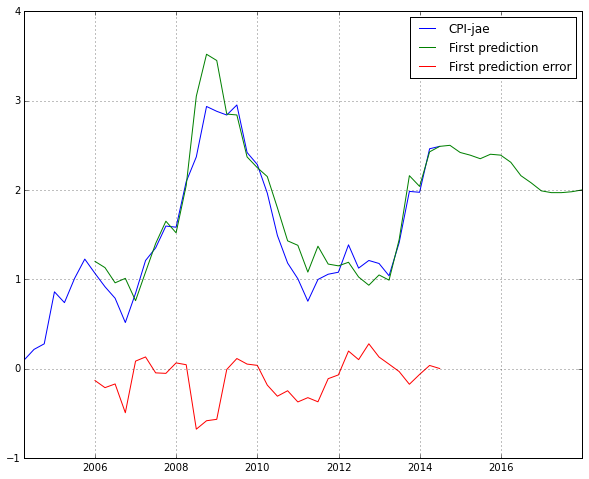

In [12]:
# How to find the vector of predictions one quarter ahead

for t in data.raw_data.index:
    for col in jae_columns:
        value = data.raw_data.loc[t,col]
        if not math.isnan(value):
            data.raw_data.loc[t,'firstpred'] = value
            data.raw_data.loc[t,'firstpred_src'] = col
            # Do not stop the loop on the first column, but rather
            # use the last column with a valid number.
            # We have to think a bit on how to get the other predictions
            # with longer horizons, should probably make a list of these.
            # An option is to work on the reverse list of columns, and add 
            # with longer prediction horizons..
            
plt.figure('First prediction',figsize=(10,8))
plt.plot(data.raw_data.index,
         data.raw_data['CPI-jae'],
         label='CPI-jae')
plt.plot(data.raw_data.index,
         data.raw_data.firstpred,
         label='First prediction')
plt.plot(data.raw_data.index,
         data.raw_data['CPI-jae']-data.raw_data.firstpred,
         label='First prediction error')
plt.legend()
plt.grid(True)
# Print the plotted data, so it can be verified towards
# the excel source data.
#print data.raw_data.loc[:,['firstpred','firstpred_src']]

# Regn ut square errors på den lista her.

PPR3_05folio
PPR1_06folio
PPR2_06folio
PPR3_06folio
PPR1_07folio
PPR2_07folio
PPR3_07folio
PPR1_08folio
PPR2_08folio
PPR3_08folio
PPR4_08folio
PPR1_09folio
PPR2_09folio
PPR3_09folio
PPR1_10folio
PPR2_10folio
PPR3_10folio
PPR1_11folio
PPR2_11folio
PPR3_11folio
PPR1_12folio
PPR2_12folio
PPR3_12folio
PPR1_13folio
PPR2_13folio
PPR3_13folio
PPR4_13folio
PPR1_14folio
PPR2_14folio
PPR3_14folio
PPR4_14folio
PPR1_15folio
PPR2_15folio
PPR3_05gap
PPR1_06gap
PPR2_06gap
PPR3_06gap
PPR1_07gap
PPR2_07gap
PPR3_07gap
PPR1_08gap
PPR2_08gap
PPR3_08gap
PPR4_08gap
PPR1_09gap
PPR2_09gap
PPR3_09gap
PPR1_10gap
PPR2_10gap
PPR3_10gap
PPR1_11gap
PPR2_11gap
PPR3_11gap
PPR1_12gap
PPR2_12gap
PPR3_12gap
PPR1_13gap
PPR2_13gap
PPR3_13gap
PPR4_13gap
PPR1_14gap
PPR2_14gap
PPR3_14gap
PPR4_14gap
PPR1_15gap
PPR2_15gap
PPR3_05cpi
PPR1_06cpi
PPR2_06cpi
PPR3_06cpi
PPR1_07cpi
PPR2_07cpi
PPR3_07cpi
PPR1_08cpi
PPR2_08cpi
PPR3_08cpi
PPR4_08cpi
PPR1_09cpi
PPR2_09cpi
PPR3_09cpi
PPR1_10cpi
PPR2_10cpi
PPR3_10cpi
PPR1_11cpi
PPR2_11cpi